<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [21]:
import csv
import matplotlib.pyplot as plt
import numpy as np

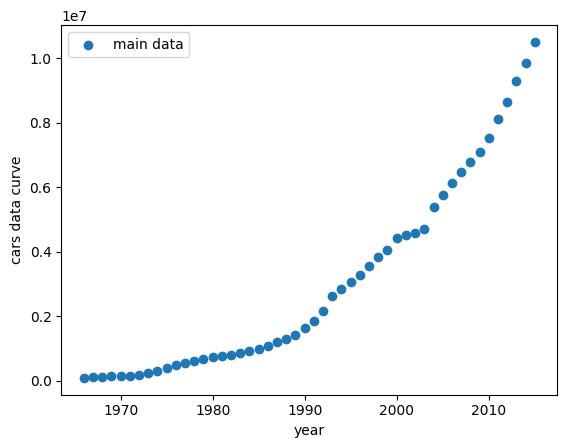

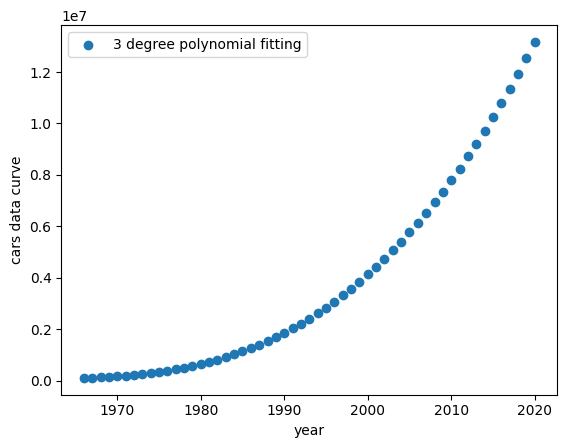

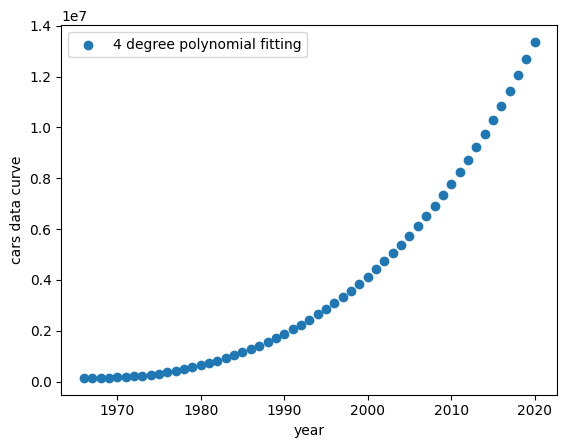

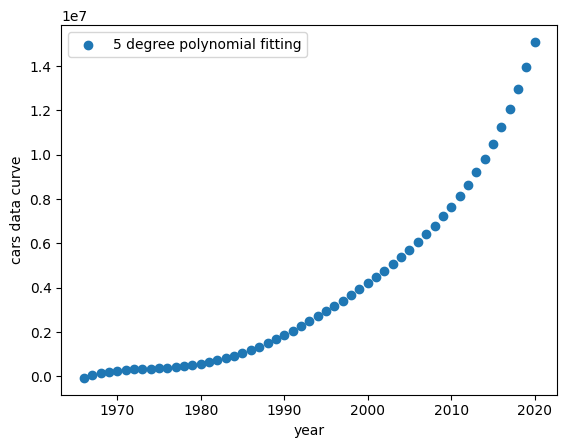

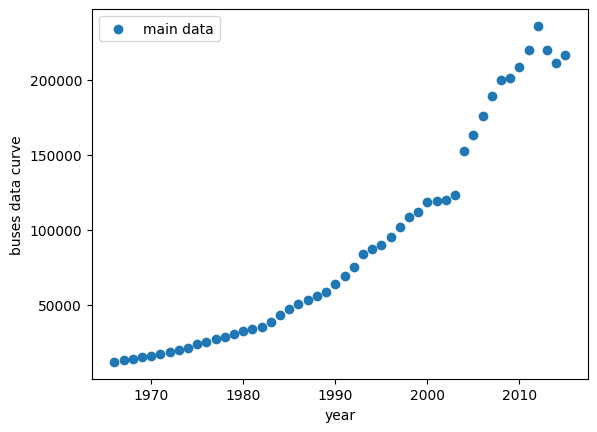

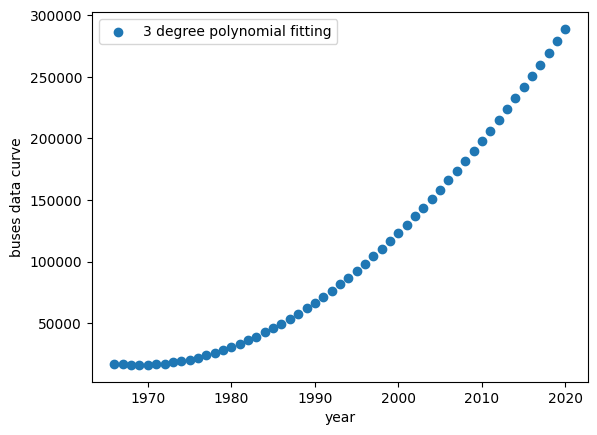

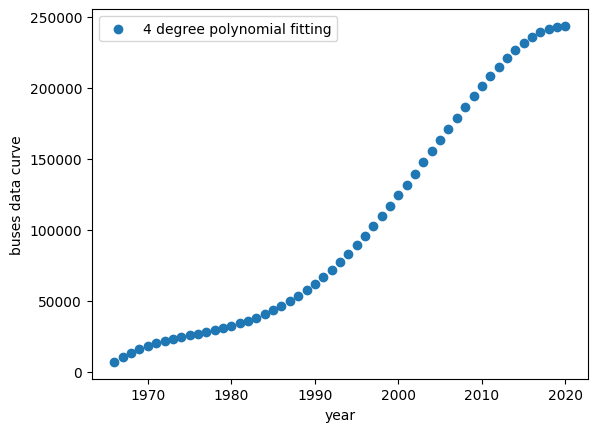

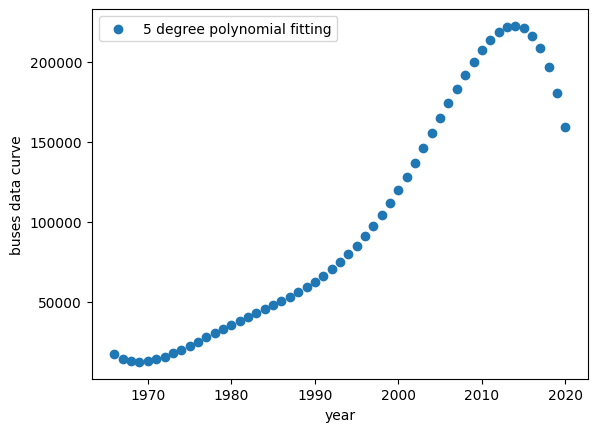

with a 4 polynomial fitting, in year 2016 the number of cars will be:
10791127
with a 4 polynomial fitting, in year 2016 the number of buses will be:
250684
with a 4 polynomial fitting, in year 2017 the number of cars will be:
11356456
with a 4 polynomial fitting, in year 2017 the number of buses will be:
260030
with a 4 polynomial fitting, in year 2018 the number of cars will be:
11941292
with a 4 polynomial fitting, in year 2018 the number of buses will be:
269525
with a 4 polynomial fitting, in year 2019 the number of cars will be:
12545963
with a 4 polynomial fitting, in year 2019 the number of buses will be:
279169
with a 4 polynomial fitting, in year 2020 the number of cars will be:
13170800
with a 4 polynomial fitting, in year 2020 the number of buses will be:
288960
with a 5 polynomial fitting, in year 2016 the number of cars will be:
10855766
with a 5 polynomial fitting, in year 2016 the number of buses will be:
235522
with a 5 polynomial fitting, in year 2017 the number of ca

C:\Users\Notebook\AppData\Local\Temp\ipykernel_25520\394149421.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("with a %d polynomial fitting, in year %d the number of %s will be:\n%d" % (n, year, vehicle, prediction))


In [22]:
years = []
cars = []
buses = []
with open("arac.csv", "r") as file :
    reader = csv.reader(file)
    flag = 0
    for row in reader :
        if (flag == 0) :
            flag = 1
            continue
        list = row[0].split(";")
        years.append(int(list[0]))
        cars.append(int(list[2]))
        buses.append(int(list[4]))
file.close()

def poly(k, year, vehicle) :
    A = np.zeros((len(year), k + 1))
    x_hat = np.zeros((k + 1, 1))
    b = np.zeros((len(vehicle), 1))
    for i in range (0, len(year)) :
        A[i, 0] = 1
        b[i] = vehicle[i]
        for j in range (1, k + 1) :
            A[i, j] = A[i, j - 1] * (year[i] - 1966)     
    P = np.matmul(np.linalg.inv(np.matmul(A.transpose(), A)), A.transpose())
    x_hat = np.matmul(P, b)
    return x_hat

x = np.arange(0, 55, 1)

def optimizePoly(x_hat, x) :
    n = x.shape
    k, l = x_hat.shape
    result = np.arange(start=0, stop=n[0], step=1, dtype=float)
    for i in range (0, len(result)) :
        result[i] = 0      
    for i in range (0, k) :
        result += x_hat[i] * x ** i    
    return result

plt.scatter(years, cars, label="main data")
plt.legend()
plt.ylabel("cars data curve")
plt.xlabel("year")
plt.show()
for k in range (3, 6):
    stringLabel = str(k) + " degree polynomial fitting"
    plt.scatter(x + 1966, optimizePoly(poly(k, years, cars), x), label=stringLabel, alpha=1)
    plt.legend()  
    plt.ylabel("cars data curve")
    plt.xlabel("year")
    plt.show()            

plt.scatter(years, buses, label="main data")
plt.legend()
plt.ylabel("buses data curve")
plt.xlabel("year") 
plt.show()
for k in range (3, 6):
    stringLabel = str(k) + " degree polynomial fitting"
    plt.scatter(x + 1966, optimizePoly(poly(k, years, buses), x), label=stringLabel, alpha=1) 
    plt.legend()  
    plt.ylabel("buses data curve")
    plt.xlabel("year")  
    plt.show()    

def predict(x_hat, year, vehicle) :
    prediction = 0
    n, m = x_hat.shape
    for i in range (0, n) :
        prediction += x_hat[i] * (year - 1966) ** i
    print("with a %d polynomial fitting, in year %d the number of %s will be:\n%d" % (n, year, vehicle, prediction))

for k in range (3, 6) :
    x_hat_cars = poly(k, years, cars)
    x_hat_buses = poly(k, years, buses)
    for i in range (2016, 2021) :
        predict(x_hat_cars, i, "cars")
        predict(x_hat_buses, i, "buses")

## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [23]:
def load_data(file_name):
    X = np.zeros((600, 2))
    with open(file_name, "r") as file :
        reader = csv.reader(file)
        i = 0
        for row in reader :
            X[i, 0] = row[0]
            X[i, 1] = row[1]
            i += 1
    file.close()        
    return X

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [24]:
def kmeans(X, K):
    # first initialize U and M
    n, d = X.shape
    M = np.zeros((K, d))
    U = np.zeros((n, K))
    
    # then we should create random centroids for clusters with the data points
    M = X[np.random.choice(range(n), K, replace=False)]  
    
    # initialize U with clusters
    U_old = np.copy(U)
    for i in range (0, n) :
            distance = []
            for j in range (0, K) :
                distance.append(np.linalg.norm(X[i] - M[j]))
            min_distance = np.inf   
            index = -1 
            for k in range (0, K) :
                if (distance[k] < min_distance) :
                    min_distance = distance[k]
                    index = k
            U_old[i, index] = 1
    
    while (2 > 1) :
        # update the clusters centroids with LSE
        for i in range (0, K) :
            index_i = []
            for j in range (0, n) :
                if (U_old[j, i] == 1) :
                    index_i.append(j)
            cluster_i = []
            for j in index_i :
                cluster_i.append(X[j])     
            if (len(cluster_i) > 0) :
                M[i] = np.mean(cluster_i, axis=0) 
        
        
        # assign new cluster to each data
        U_new = np.copy(U)
        for i in range (0, n) :
            distance = []
            for j in range (0, K) :
                distance.append(np.linalg.norm(X[i] - M[j]))
            min_distance = np.inf   
            index = -1 
            for k in range (0, K) :
                if (distance[k] < min_distance) :
                    min_distance = distance[k]
                    index = k
            U_new[i, index] = 1
        
        # if after update any cluster doesn't change we return best clustering
        if (np.array_equal(U_old, U_new)) :
            break
        U_old = U_new       
    U = U_new
    
    return M, U

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [25]:
def plot_clusters(X, M, U):
    n, d = X.shape
    K, d = M.shape
    markers = ['+', 'H', '*', '.', ',', 'x', 'X', 'P', 's', 'D', 'd', 'p', 'o', 'h', 'v', '^', '<', '>', '1', '2', '3', '4', '|', '_']
    for i in range (0, K) :
        Y_0 = []
        Y_1 = []
        for j in range (0, n) :
            if (U[j, i] == 1) :
                Y_0.append(X[j, 0])
                Y_1.append(X[j, 1])    
        plt.scatter(Y_0, Y_1, label="cluster no."+str(i + 1), marker=markers[i])
        plt.gca().add_patch(plt.Circle((M[i, 0], M[i, 1]), 0.5, fill=False, edgecolor='black', linestyle='-'))
    plt.scatter(np.transpose(M)[0], np.transpose(M)[1], label="centroid", color="black")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("data distribution and K-Means clustering")
    plt.legend()
    plt.show()

**<font color="red"> Don't edit the code in the following cell!</font>**

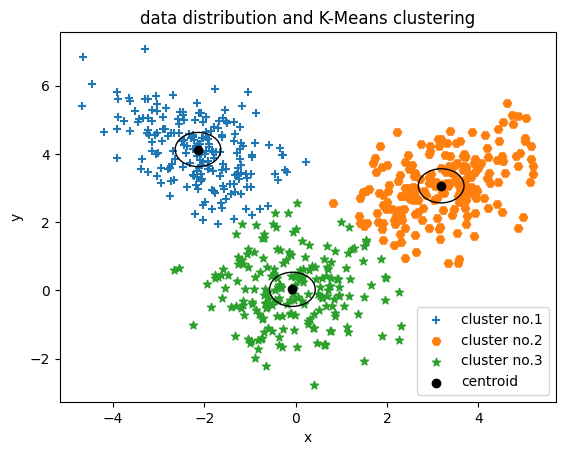

In [26]:
# Evaluation Cell

# Load the data from the file
X = load_data("Image.csv")
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

Answer : In this method, data is divided into k categories and data is assigned to categories with LSE. The advantages of this method include easy access to its algorithm, use for large datasets, algorithm convergence, and the ability to generalize it to categories with special features. The disadvantages of this method include the way to choose the optimal k (which should use a method like elbow method) that may have a high runtime, depending on how the categories are initialized, and ignoring outliers. An important point about this method is that the way the category centers are initialized can have a significant impact. Also, one of the factors that can affect the efficiency of this method is the volume and density of data in each category. For example, if the density and volume of data in one category is significantly higher than another category, the error of this method may increase.

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

Answer : In the elbow method, the point of inflection in the SSE (Sum of Squared Errors) plot with respect to the number of clusters is referred to as the optimal K for classification. As shown in the figure below, for this dataset, K=3 will result in the best clustering.

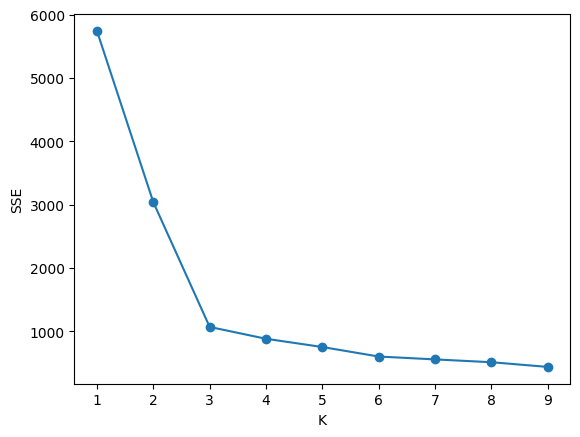

In [27]:
def elbow_method(X, K_list):
    n, d = X.shape
    S = np.zeros((len(K_list), 1))
    counter = 0
    for K in K_list :
        M, U = kmeans(X, K)
        for i in range (0, n) :
            for j in range (0, K) :
                if (U[i, j] == 1) :
                    S[counter] += np.linalg.norm(X[i] - M[j]) ** 2
        counter += 1            
    return S
K_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(K_list, elbow_method(X, K_list), marker='o')
plt.ylabel('SSE')
plt.xlabel('K')
plt.show() 

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [29]:
# TODO: First 25 rows of the dataset
head_data_frame = pd.read_csv("sentiment.csv").head(25)
head_data_frame

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [30]:
# TODO: Last 10 rows of the dataset
tail_data_frame = pd.read_csv("sentiment.csv").tail(10)
tail_data_frame 

,PhraseId,SentenceId,Phrase,Sentiment
9990,9991,419,this a comedy or serious drama,2
9991,9992,419,a comedy or serious drama,2
9992,9993,419,a comedy or,2
9993,9994,419,a comedy,2
9994,9995,419,serious drama,2
9995,9996,420,plays like some corny television production fr...,1
9996,9997,420,plays like some corny television,1
9997,9998,420,like some corny television,2
9998,9999,420,some corny television,1
9999,10000,420,corny television,1


In [31]:
# TODO: information of columns 
data = pd.read_csv("sentiment.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10000 non-null  int64 
 1   SentenceId  10000 non-null  int64 
 2   Phrase      10000 non-null  object
 3   Sentiment   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


,PhraseId,SentenceId,Sentiment
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,200.162500,2.044100
std,2886.89568,121.775362,0.833681
min,1.00000,1.000000,0.000000
25%,2500.75000,95.000000,2.000000
50%,5000.50000,195.000000,2.000000
75%,7500.25000,304.000000,2.000000
max,10000.00000,420.000000,4.000000


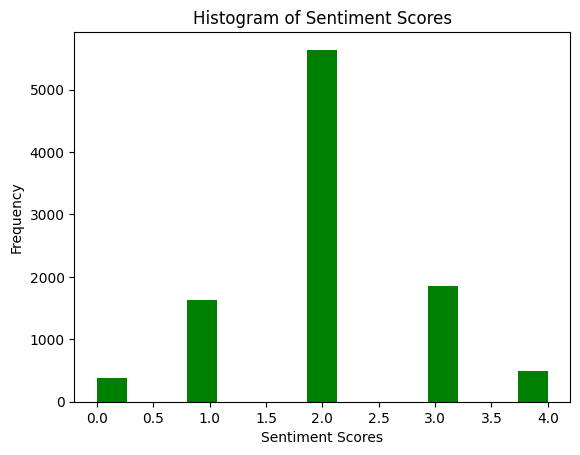

In [32]:
# TODO: histogram of sentiment scores
plt.hist(data['Sentiment'], color='green', bins='auto')
plt.title("Histogram of Sentiment Scores")
plt.xlabel("Sentiment Scores")
plt.ylabel("Frequency")
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [33]:
def preprocess_text(text):
    
    # TODO:
    # convert all text and words into lowercase
    text = text.lower()
    # removing punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    # creating a list of stop words
    stopwords_list = set(stopwords.words('english'))
    # break down the text into individual words or tokens
    tokens = text.split()
    # filter tokens
    filtered_tokens = [word for word in tokens if word not in stopwords_list]
    # concat words
    text = ' '.join(filtered_tokens)
    
    return text

In [34]:
# TODO: Apply the preprocessing function to the text column
data['preprocessed Phrase'] = data['Phrase'].apply(preprocess_text)

### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

Answer : In this method, after cleaning the text, we assign a unique identifier to each word. Then, for each text, we place the number of repetitions of each word in an array for that text. We use this vector for algorithmic work on these texts.

In Python, the CountVectorizer function is used in the sklearn library for this purpose. This function places the number of repetitions of the main words of the texts that we previously extracted (text cleaning) in a series of arrays that can be used as input for algorithmic work.

## <font color="red"> TODO : discuss BoW method </font>

...

In [35]:
# TODO: Extract features from the preprocessed text data

vectorizer = CountVectorizer()
preprocessed_text = []
sentiments = []
for text in data['preprocessed Phrase'] :
    preprocessed_text.append(text)
for i in data['Sentiment'] :
    sentiments.append(i)        
features = vectorizer.fit_transform(preprocessed_text)

### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [36]:
# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, sentiments, test_size=0.20, random_state=42)

# TODO: Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# TODO: Make predictions on the testing set
y_pred_continuous = linear_model.predict(X_test)
y_pred_discrete = np.round(y_pred_continuous)

# TODO: Evaluate the model using mean squared error
mse_continuous = mean_squared_error(y_test, y_pred_continuous)
print("mse in continuous mode is :\n%.5f" % (mse_continuous))
mse_discrete = mean_squared_error(y_test, y_pred_discrete)
print("mse in discrete mode is :\n%.5f" % (mse_discrete))

mse in continuous mode is :
0.41244
mse in discrete mode is :
0.48450


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

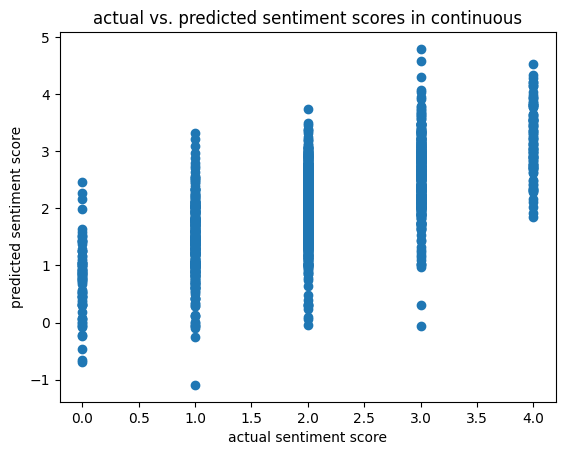

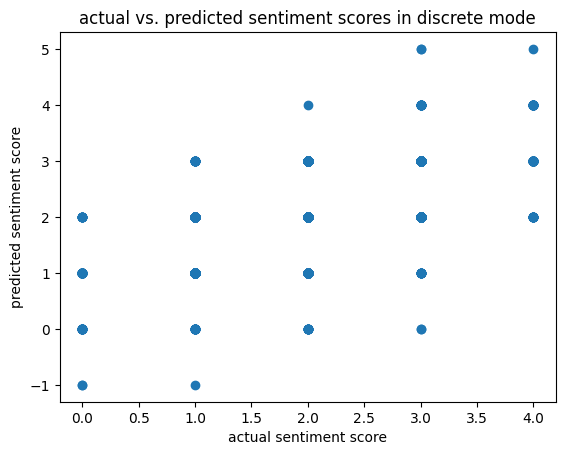

In [37]:
y_test = np.array(y_test)
y_pred_continuous = np.array(y_pred_continuous)
plt.scatter(y_test, y_pred_continuous)
plt.xlabel('actual sentiment score')
plt.ylabel('predicted sentiment score')
plt.title('actual vs. predicted sentiment scores in continuous')
plt.show()

y_pred_discrete = np.array(y_pred_discrete)
plt.scatter(y_test, y_pred_discrete)
plt.xlabel('actual sentiment score')
plt.ylabel('predicted sentiment score')
plt.title('actual vs. predicted sentiment scores in discrete mode')
plt.show()

## <font color="red"> Discuss the resulted figure </font>

...

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [41]:
vectorizer = CountVectorizer()
preprocessed_text = []
sentiments = []
for text in data['preprocessed Phrase'] :
    preprocessed_text.append(text)
for i in data['Sentiment'] :
    sentiments.append(i)        
features = vectorizer.fit_transform(preprocessed_text)

# first extract all of the words
vocabulary = []
for text in preprocessed_text:
    for word in text.split(" "):
        if word not in vocabulary:
            if len(word) >= 2 :
                vocabulary.append(word)

# vectorize every text and then append to features matrix
new_features = []
for text in preprocessed_text :
    feature_vector = [0] * len(vocabulary)
    for word in text.split(" "):
        if word in vocabulary :
            feature_vector[vocabulary.index(word)] += 1
    new_features.append(feature_vector) 

# difference between two feature matrices       
main_norm = 0
features = features.nonzero()[1]      
for i in range (0, len(features)) :
    main_norm += features[i] ** 2
main_norm = np.sqrt(main_norm)    
        
new_norm = 0        
l = len(new_features)
k = len(new_features[0])
for i in range (0, l) :
    for j in range (0, k) :
        new_norm += new_features[i][j] ** 2           
new_norm = np.sqrt(new_norm)                
print("the difference between two methods is :%.5f" % (np.abs(new_norm - main_norm)))              

C:\Users\Notebook\AppData\Local\Temp\ipykernel_25520\16394402.py:31: RuntimeWarning: overflow encountered in scalar add
  main_norm += features[i] ** 2


the difference between two methods is :42039.12713
